# Loan Application Status Prediction Project

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Independent Variables:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

Dependent Variable (Target Variable):

Loan_Status

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
# checking null valus
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

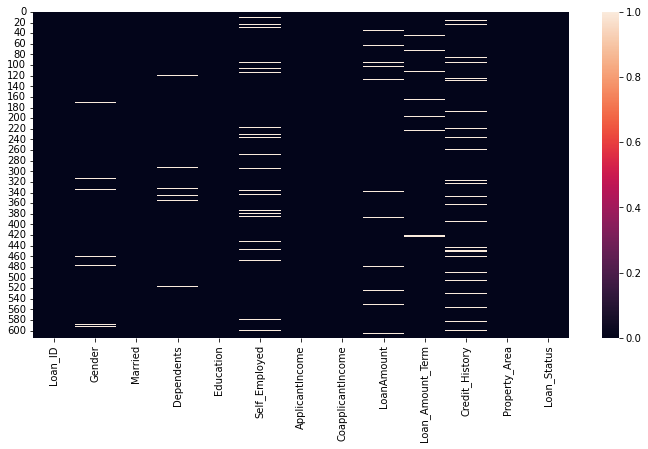

In [8]:
#checking null values in heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


object type column:
    
1.Loan_ID
2.Gender
3.Married 4.Dependents
5.Education
6.Self_Employed
7.Property_area
8.Loan_status

float type column:
    
1.CoapplicantIncome
2.LoanAmount
3.Loan_Amount_Term
4.Property_area

Int type column:
    
1.ApplicantIncome

In [10]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")

In [12]:
#Filling the Missing Value Of Married Column
df["Married"]=imp.fit_transform(df["Married"].values.reshape(-1,1))

In [15]:
#Filling the Missing Value Of Gender Column
df["Gender"]=imp.fit_transform(df["Gender"].values.reshape(-1,1))

In [17]:
#Filling the Missing Value Of Dependents Column
df["Dependents"]=imp.fit_transform(df["Dependents"].values.reshape(-1,1))

In [18]:
#Filling the Missing Value Of Self_Employed Column
df["Self_Employed"]=imp.fit_transform(df["Self_Employed"].values.reshape(-1,1))

In [19]:
imp_f=SimpleImputer(missing_values=np.NaN,strategy="mean")

In [20]:
#Filling the Missing Value Of LoanAmount Column
df["LoanAmount"]=imp_f.fit_transform(df["LoanAmount"].values.reshape(-1,1))

In [22]:
#Filling the Missing Value Of Loan_Amount_Term Column
df["Loan_Amount_Term"]=imp.fit_transform(df["Loan_Amount_Term"].values.reshape(-1,1))

In [24]:
#Filling the Missing Value Of Credit_History Column
df["Credit_History"]=imp.fit_transform(df["Credit_History"].values.reshape(-1,1))

In [25]:
#checking Null Values in the DataFrame
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

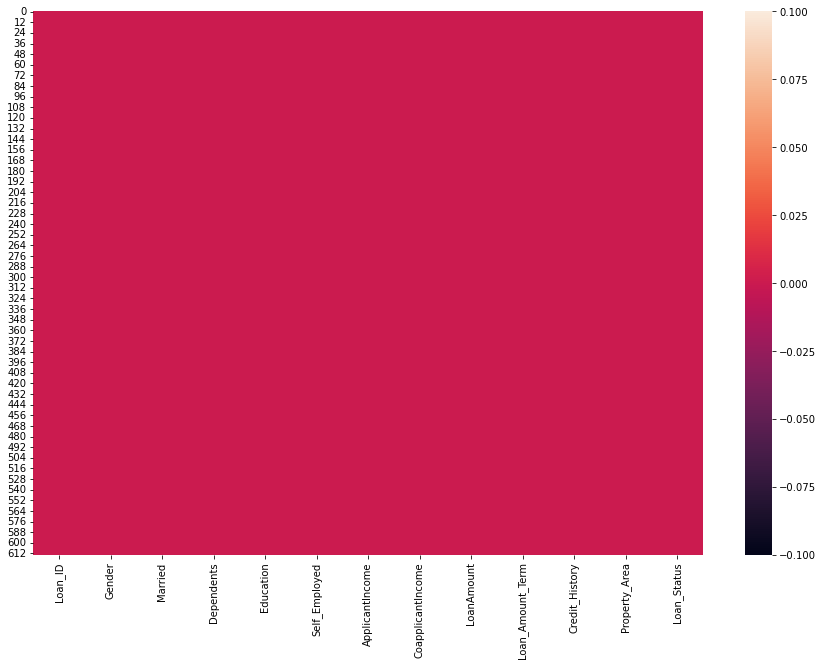

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

we can see that there is no nullvalue present in our dataset

In [29]:
# checking the shape
df.shape

(614, 13)

we see that there are 614 rows and 13 volumns in our DataFrame.This means we have 614 customer data and 12 types of data to determine whether a new customer is eligible for a loan or not.

In [32]:
# cehcking columns name
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [33]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [34]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [35]:
#droping "Loan_ID"
df=df.drop("Loan_ID",axis=1)

We see that the "Loan_ID" columns in our dataframes identify of each loan applicant customer..se we drop this column from our DataFrame.

In [37]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [38]:
df.shape

(614, 12)

In [40]:
df.dtypes.index

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [41]:
# checking categorical columns 
categorical_columns = []
index_c=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
        index_c.append(m)
    m=m+1
print(categorical_columns)
print(index_c)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
[0, 1, 2, 3, 4, 10, 11]


In [42]:
len(categorical_columns)

7

In [43]:
# checking numerical columns
numerical_columns = []
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
[5, 6, 7, 8, 9]


In [44]:
len(numerical_columns)

5

In [45]:
len(df.dtypes.index)==len(categorical_columns)+len(numerical_columns)

True

# Univariate Analysis

column name Gender


Male      502
Female    112
Name: Gender, dtype: int64


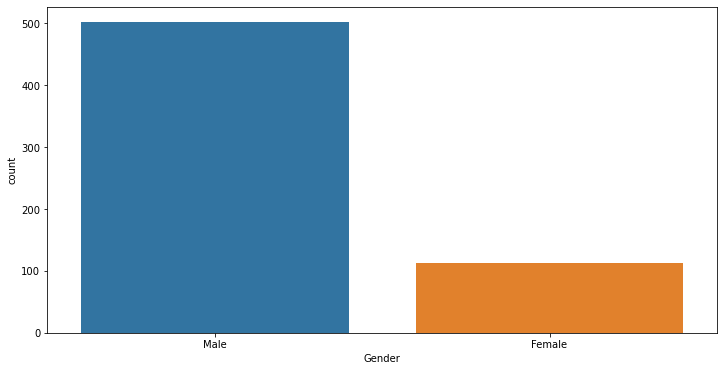



####################################################################################################


In [46]:
i = 0
print('column name',df.columns[i])
print('\n')
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print('#'*100)

we can see in above graph that male have high values in gender column

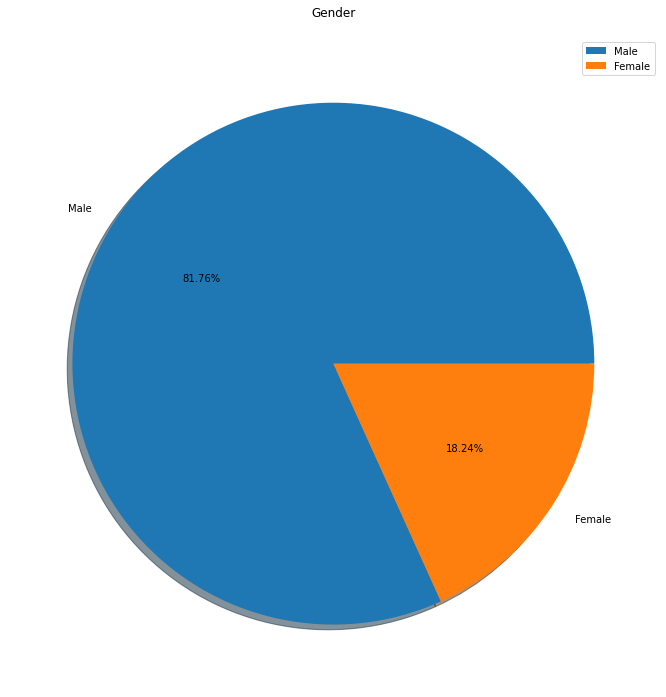

In [48]:
plt.figure(figsize=(20,12))
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,shadow=True,autopct='%1.2f%%')
plt.title('Gender\n')
plt.legend(prop={'size':10})
plt.show()

column Name: Married


Yes    401
No     213
Name: Married, dtype: int64


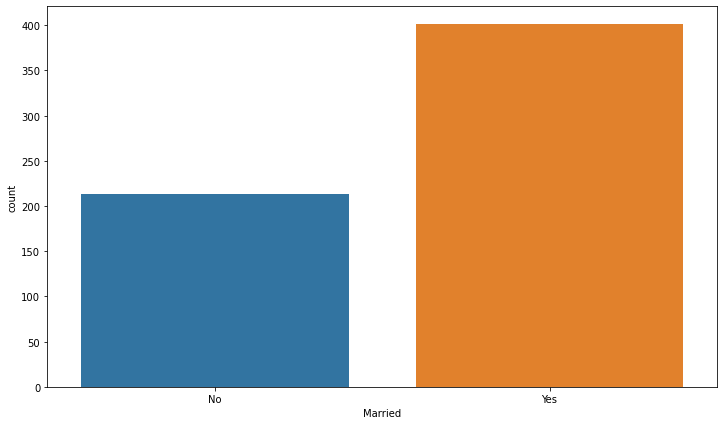



####################################################################################################


In [49]:
i=1
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

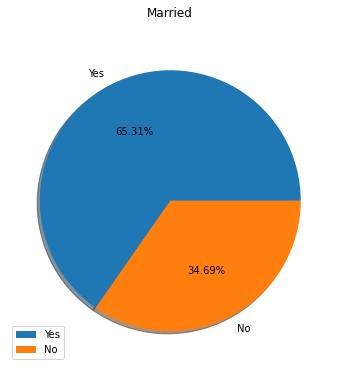

In [52]:
plt.figure(figsize=(12,6))
plt.pie(df['Married'].value_counts(), labels=df['Married'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Married\n')
plt.legend(prop={'size':10})
plt.show()

we see from the above graph that most of the loan applicant customer is married

column Name: Dependents


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


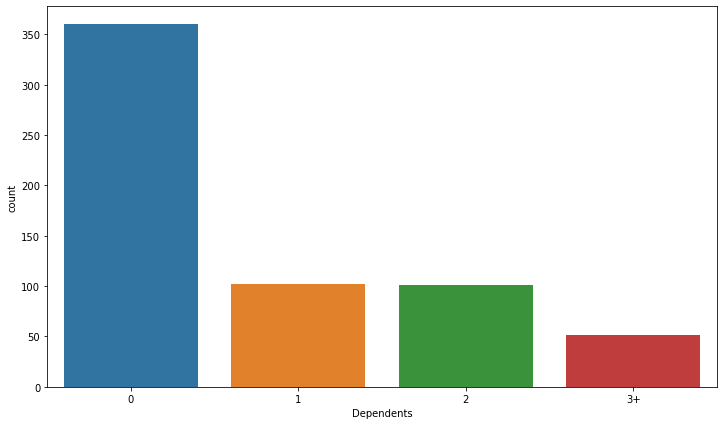



####################################################################################################


In [53]:
i=2
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

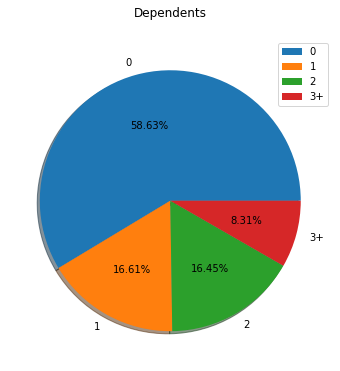

In [55]:
plt.figure(figsize=(12,6))
plt.pie(df['Dependents'].value_counts(), labels=df['Dependents'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Dependents\n')
plt.legend(prop={'size':10})
plt.show()

Most of the applicant is independent

column Name: Education


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


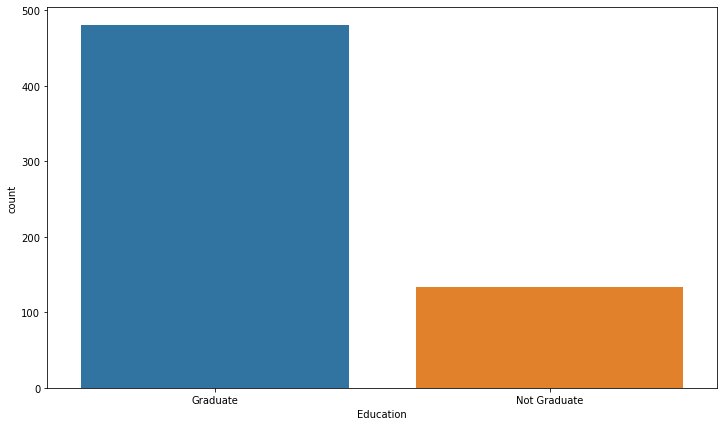



####################################################################################################


In [56]:
i=3
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

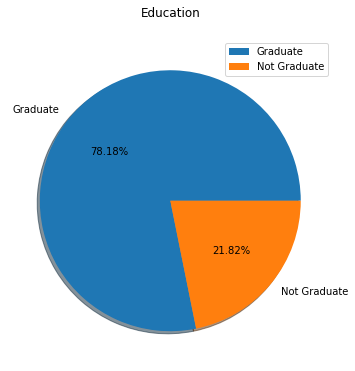

In [57]:
plt.figure(figsize=(12,6))
plt.pie(df['Education'].value_counts(), labels=df['Education'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Education\n')
plt.legend(prop={'size':10})
plt.show()

we can in above graph Graduate have high value present in education column

column Name: Self_Employed


No     532
Yes     82
Name: Self_Employed, dtype: int64


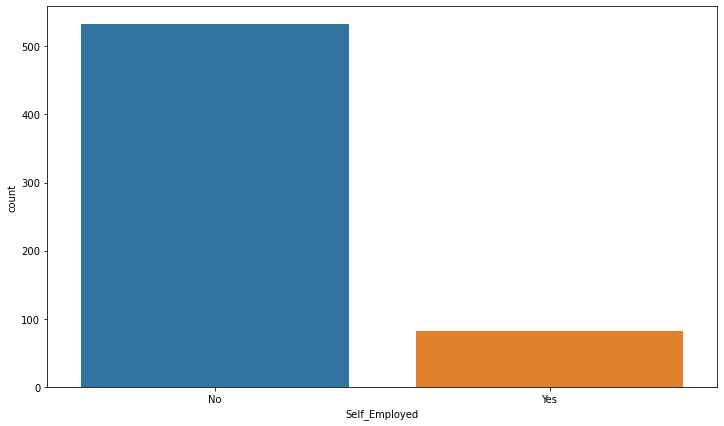



####################################################################################################


In [58]:
i=4
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

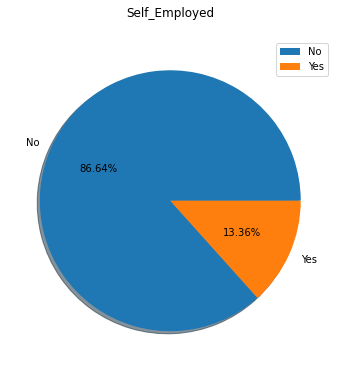

In [60]:
plt.figure(figsize=(12,6))
plt.pie(df['Self_Employed'].value_counts(), labels=df['Self_Employed'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Self_Employed\n')
plt.legend(prop={'size':10})
plt.show()

we see from the above count plot and pie plot that most of the applicant of loan is not Self_Employed

column Name: Loan_Amount_Term


360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


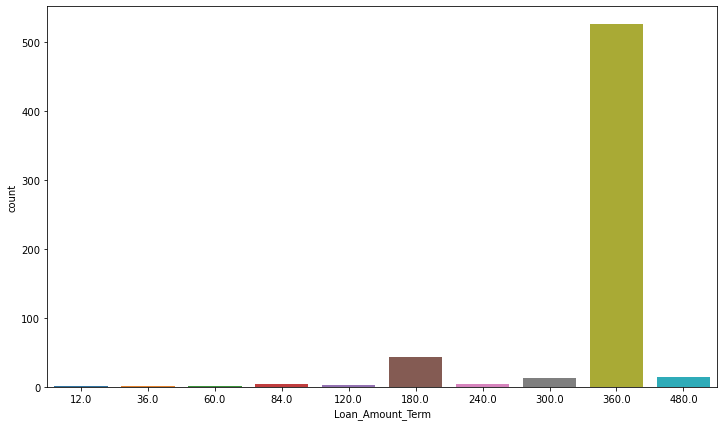



####################################################################################################


In [61]:
i=8
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

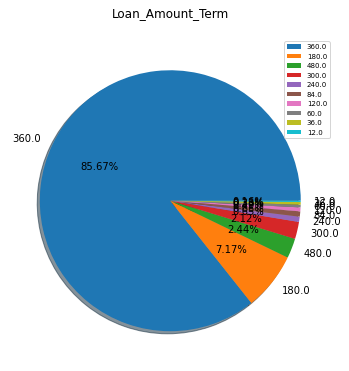

In [66]:
plt.figure(figsize=(12,6))
plt.pie(df['Loan_Amount_Term'].value_counts(), labels=df['Loan_Amount_Term'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Loan_Amount_Term\n')
plt.legend(prop={'size':7})
plt.show()

we see from the above plot there are 10 types of Loan_Amount_Term and most of the applicant Loan_Amount_Term is 360 and very less applicant Loan_Amount_Term is 12.0 or 36.0 or 60.0

column Name: Credit_History


1.0    525
0.0     89
Name: Credit_History, dtype: int64


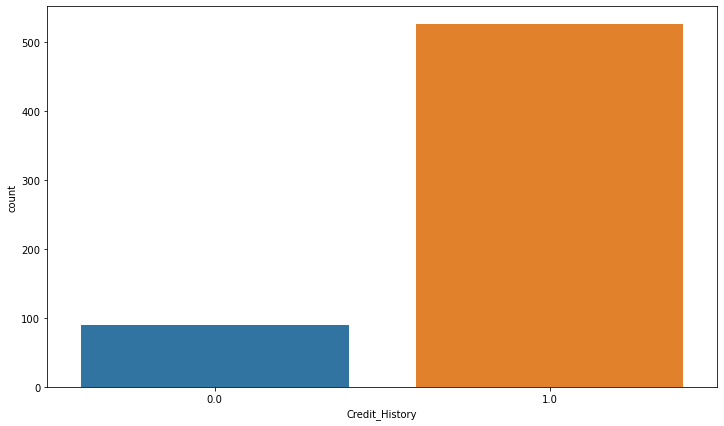



####################################################################################################


In [67]:
i=9
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

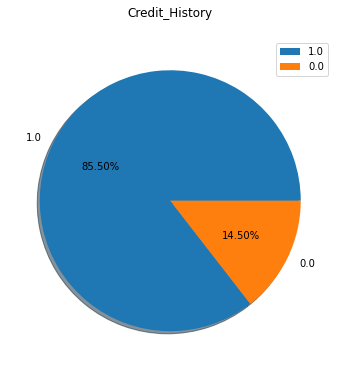

In [68]:
plt.figure(figsize=(12,6))
plt.pie(df['Credit_History'].value_counts(), labels=df['Credit_History'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Credit_History\n')
plt.legend(prop={'size':10})
plt.show()

Approximately 84% appilcant credit history is good

column Name: Property_Area


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


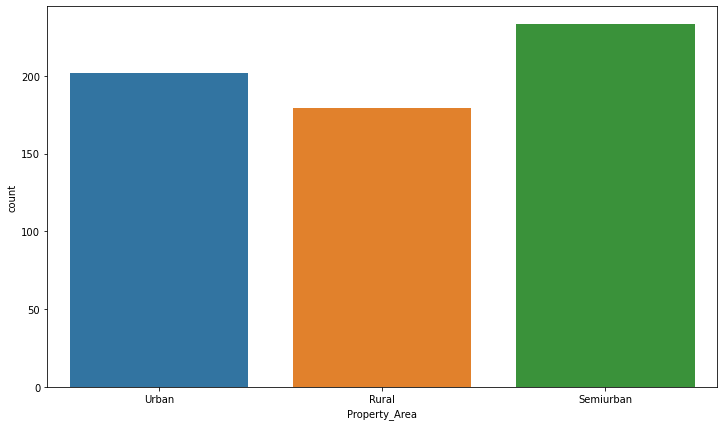



####################################################################################################


In [69]:
i=10
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

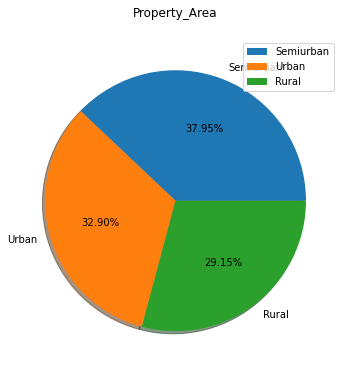

In [71]:
plt.figure(figsize=(12,6))
plt.pie(df['Property_Area'].value_counts(), labels=df['Property_Area'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Property_Area\n')
plt.legend(prop={'size':10})
plt.show()

column Name: Loan_Status


Y    422
N    192
Name: Loan_Status, dtype: int64


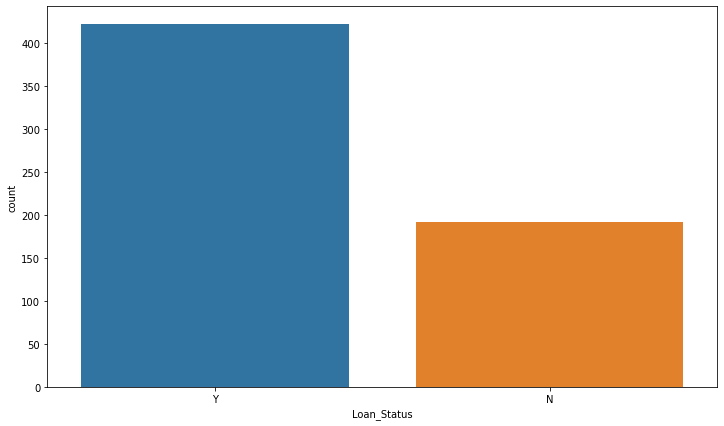



####################################################################################################


In [72]:
i=11
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

we see from the above plot that the number of loan approved applicant is higher than the number of non approved loan applicant.

In [73]:
numerical_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [74]:
index_n

[5, 6, 7, 8, 9]

column Name: ApplicantIncome


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
len= 505


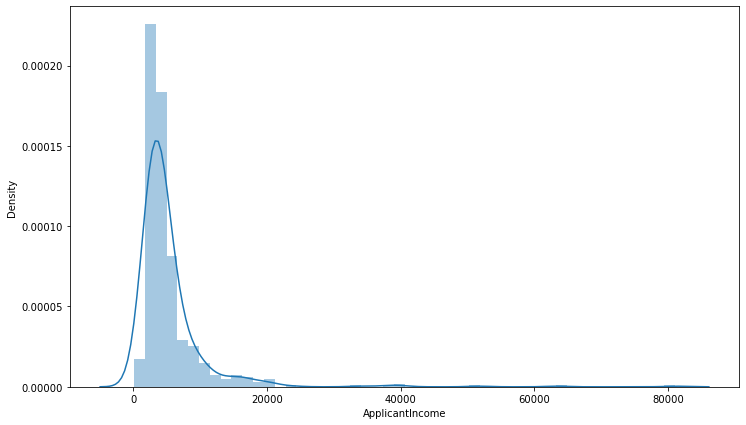



####################################################################################################


In [75]:
i=5 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

since,the tails of the curve present in right side,so we must tail that th data of ApplicantIncome column is positively skewed.we control this skewness later on. most of the applicant income is between 1000 to 6000. few applicant's income greater than 20000.

column Name: CoapplicantIncome


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
len= 287


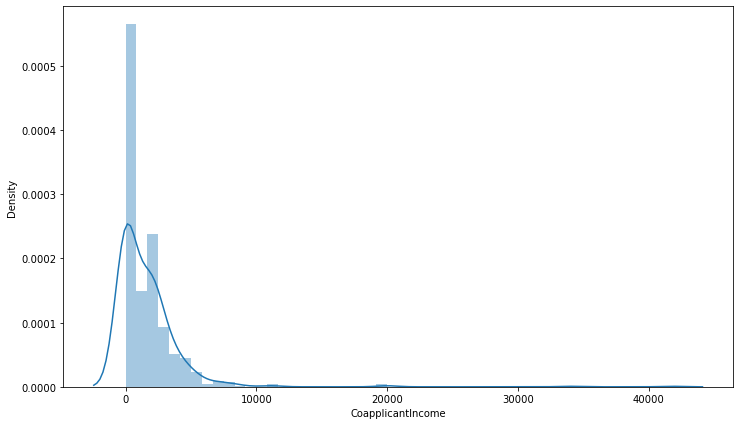



####################################################################################################


In [78]:
i=6 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

since,the tails of the curve present in right side,so we must tail that the data of CoapplicantIncome column is positively skewed.we control this skewness later on. most of the Coapplicant income is between 0 to 3000. few applicant's income greater than 20000.

column Name: LoanAmount


146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64
len= 204


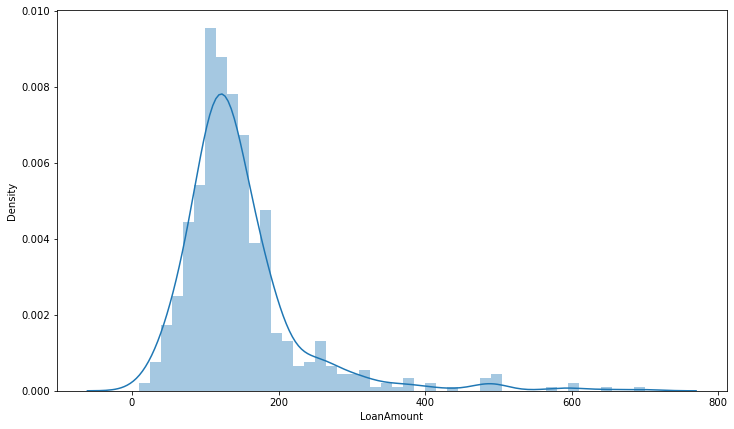



####################################################################################################


In [81]:
i=7 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

above distrbution plot is positively skewed

column Name: Loan_Amount_Term


360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
len= 10


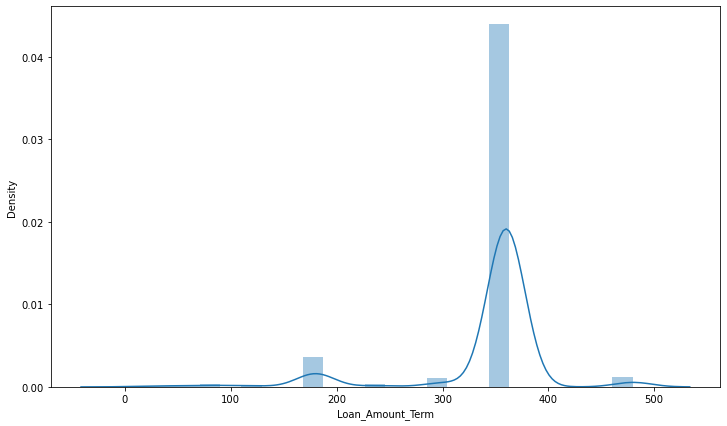



####################################################################################################


In [82]:
i=8 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

column Name: Credit_History


1.0    525
0.0     89
Name: Credit_History, dtype: int64
len= 2


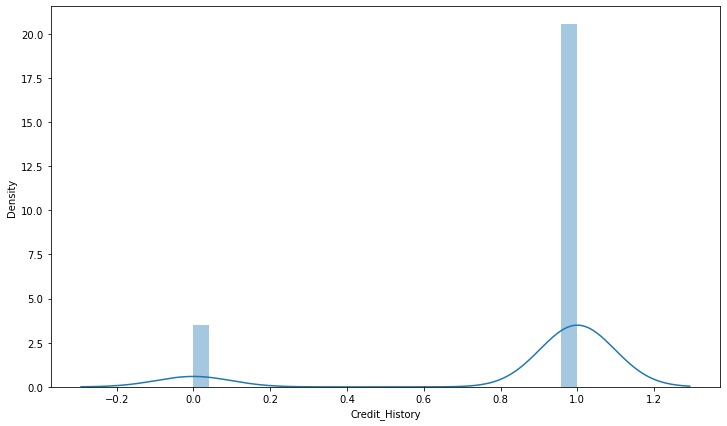



####################################################################################################


In [83]:
i=9 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

# Loan_Status Vs Gender

Loan_Status Vs Gender




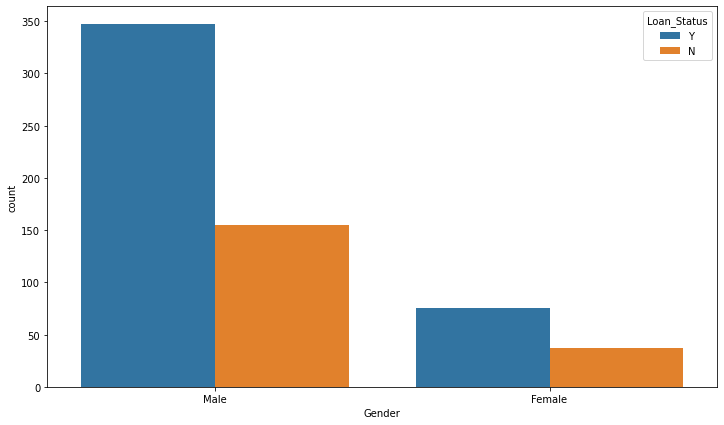

####################################################################################################


In [85]:
i=0
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]],hue=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

# Loan_Status Vs Married

Loan_Status Vs Married




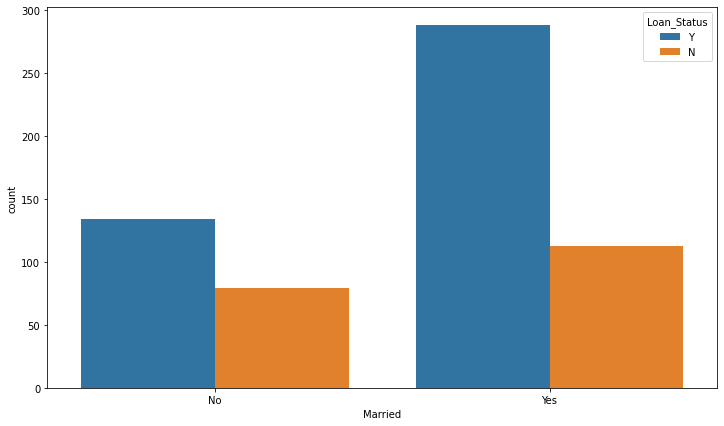

####################################################################################################


In [87]:
i=1
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]],hue=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

# Loan_Status Vs Education

Loan_Status Vs Education




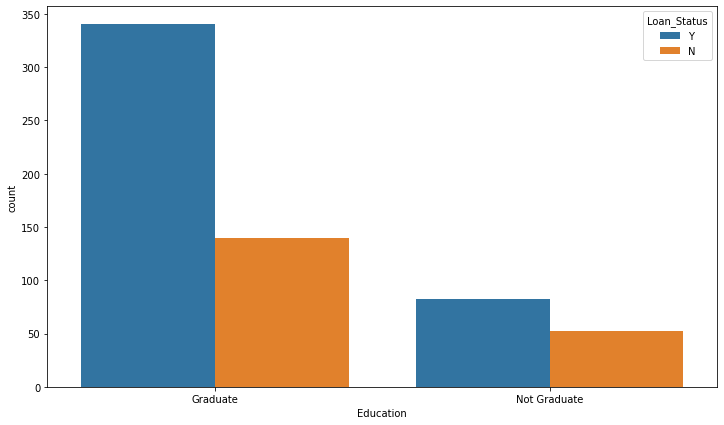

####################################################################################################


In [88]:
i=3
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]],hue=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

# Loan_Status Vs Self_Employed

Loan_Status Vs Self_Employed




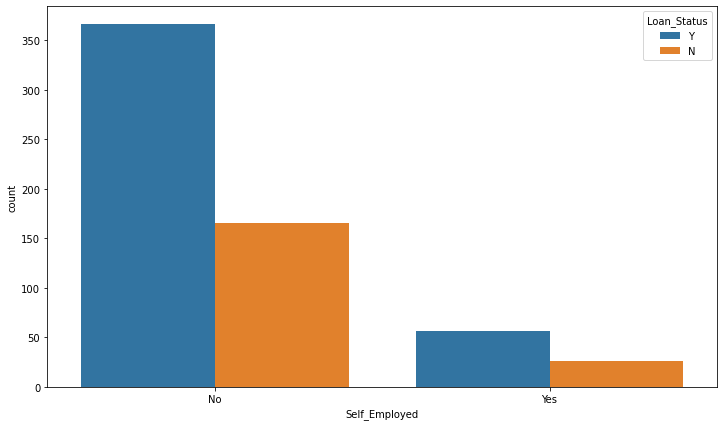

####################################################################################################


In [89]:
i=4
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]],hue=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

# Loan_Status Vs Loan_Amount_Term

Loan_Status Vs Loan_Amount_Term




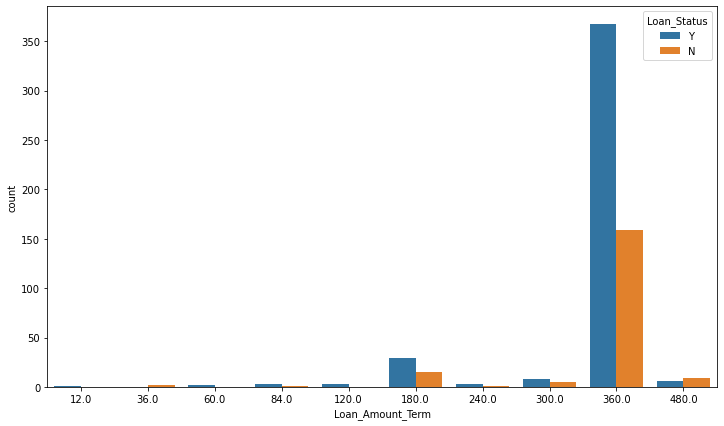

####################################################################################################


In [90]:
i=8
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]],hue=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

# Loan_Status Vs Credit_History

Loan_Status Vs Credit_History




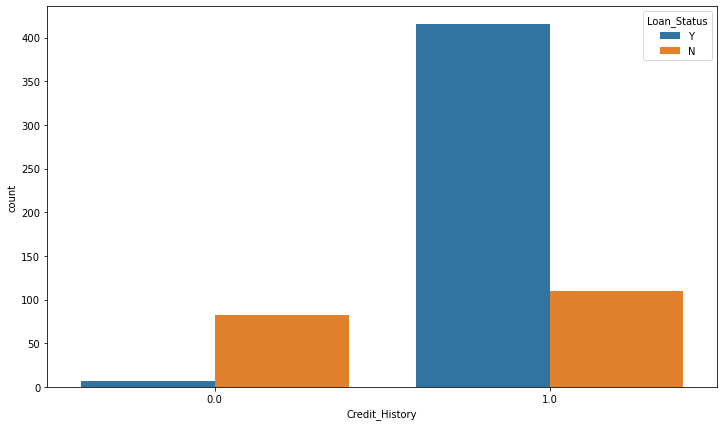

####################################################################################################


In [91]:
i=9
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]],hue=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

If you have a good credit history then the chance of getting a loan is high

# Loan_Status Vs Property_Area

Loan_Status Vs Property_Area




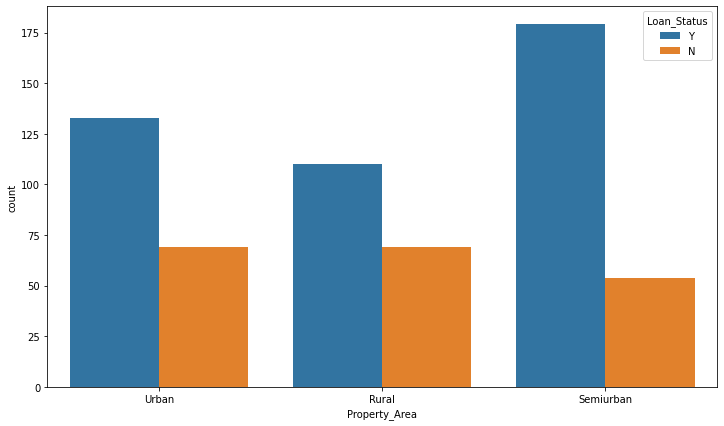

####################################################################################################


In [93]:
i=10
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]],hue=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

If your property area is semi urban type then the chance of getting a loan is high

In [94]:
index_n

[5, 6, 7, 8, 9]

# Loan_Status Vs ApplicantIncome

Loan_Status Vs ApplicantIncome




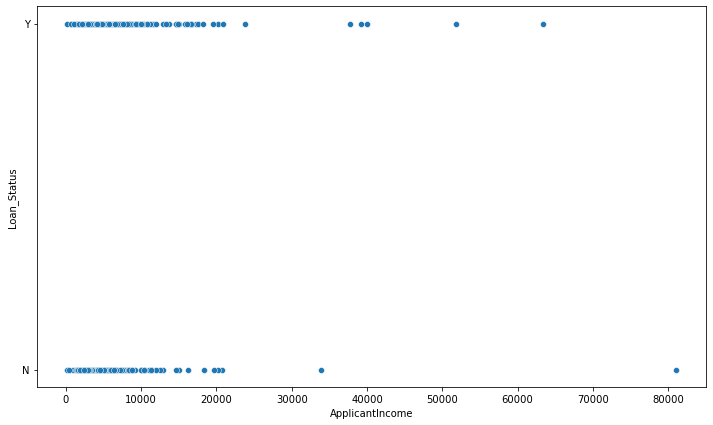

####################################################################################################


In [95]:
i=5
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.scatterplot(df[df.columns[i]],y=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

The data is equaly distributed in 0 to 20000.the above plot shows the outliers of the column

# Loan_Status Vs CoapplicantIncome

Loan_Status Vs CoapplicantIncome




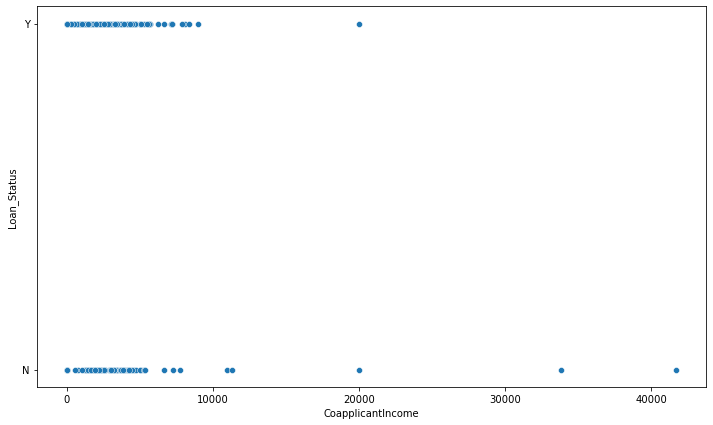

####################################################################################################


In [97]:
i=6
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.scatterplot(df[df.columns[i]],y=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

The data is equally distributed in 0 to 10000 and outliers present

# Loan_Status Vs LoanAmount

Loan_Status Vs LoanAmount




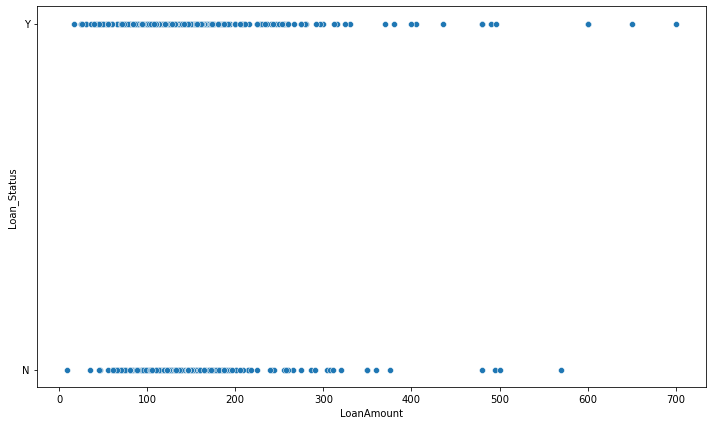

####################################################################################################


In [99]:
i=7
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.scatterplot(df[df.columns[i]],y=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

The data is equally distributed in 50 to 350 and some outliers present

# Loan_Status Vs Loan_Amount_Term


Loan_Status Vs Loan_Amount_Term




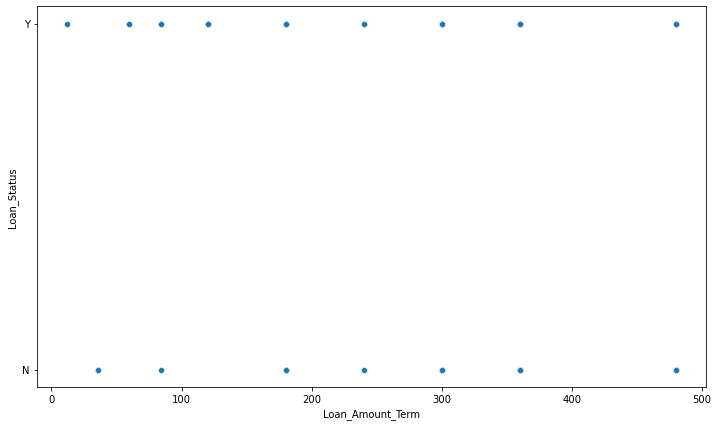

####################################################################################################


In [100]:
i=8
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.scatterplot(df[df.columns[i]],y=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

# Multivariate Analysis

<Figure size 1080x504 with 0 Axes>

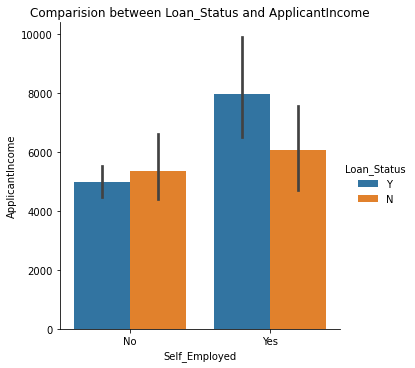

In [101]:
#checking relation between Self_Employed and ApplicantIncome
plt.figure(figsize=(15,7))
sns.catplot(x='Self_Employed',y='ApplicantIncome',data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between Loan_Status and ApplicantIncome")
plt.show()

If applicant is self employed and invome is everage then chance of geting the loan is high

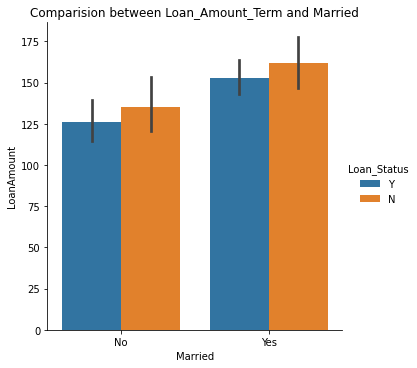

In [102]:
#checking relation between LoanAmount and Married on the basis of target
sns.catplot(x='Married',y="LoanAmount",data=df,kind='bar',hue="Loan_Status")
plt.title("Comparision between Loan_Amount_Term and Married")
plt.show()

From the above plot we say that if a applicant is married and loan amount is average then chance of geting loan is high.

<Figure size 1080x504 with 0 Axes>

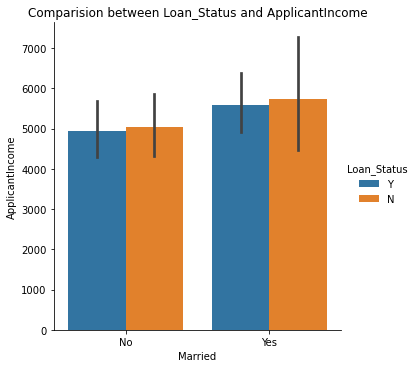

In [103]:
#checking relation between Self_Employed and ApplicantIncome
plt.figure(figsize=(15,7))
sns.catplot(x='Married',y='ApplicantIncome',data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between Loan_Status and ApplicantIncome")
plt.show()

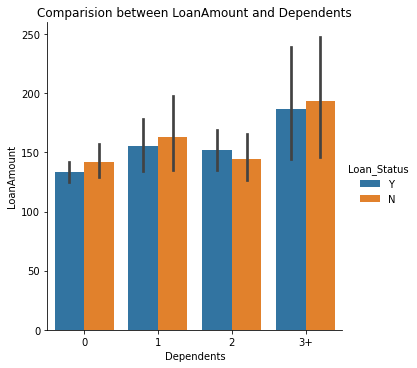

In [104]:
#checking relation between Loan_Amount and Dependents on the basis of target
sns.catplot(x='Dependents',y="LoanAmount",data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between LoanAmount and Dependents")
plt.show()

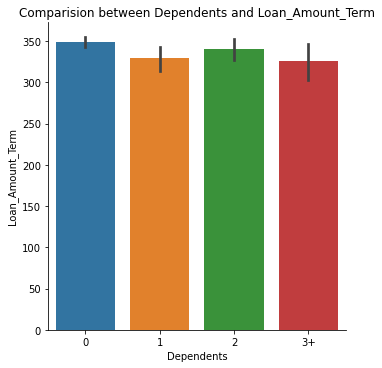

In [105]:
#checking relation between Loan_Amount_Term and Dependents
sns.catplot(x='Dependents',y="Loan_Amount_Term",data=df,kind='bar')
plt.title("Comparision between Dependents and Loan_Amount_Term")
plt.show()

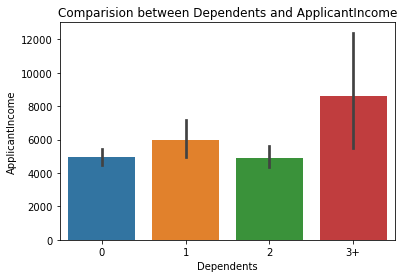

In [106]:
#let's check the applicant income as per Dependents
sns.barplot(x='Dependents',y="ApplicantIncome",data=df)
plt.title("Comparision between Dependents and ApplicantIncome")
plt.show()

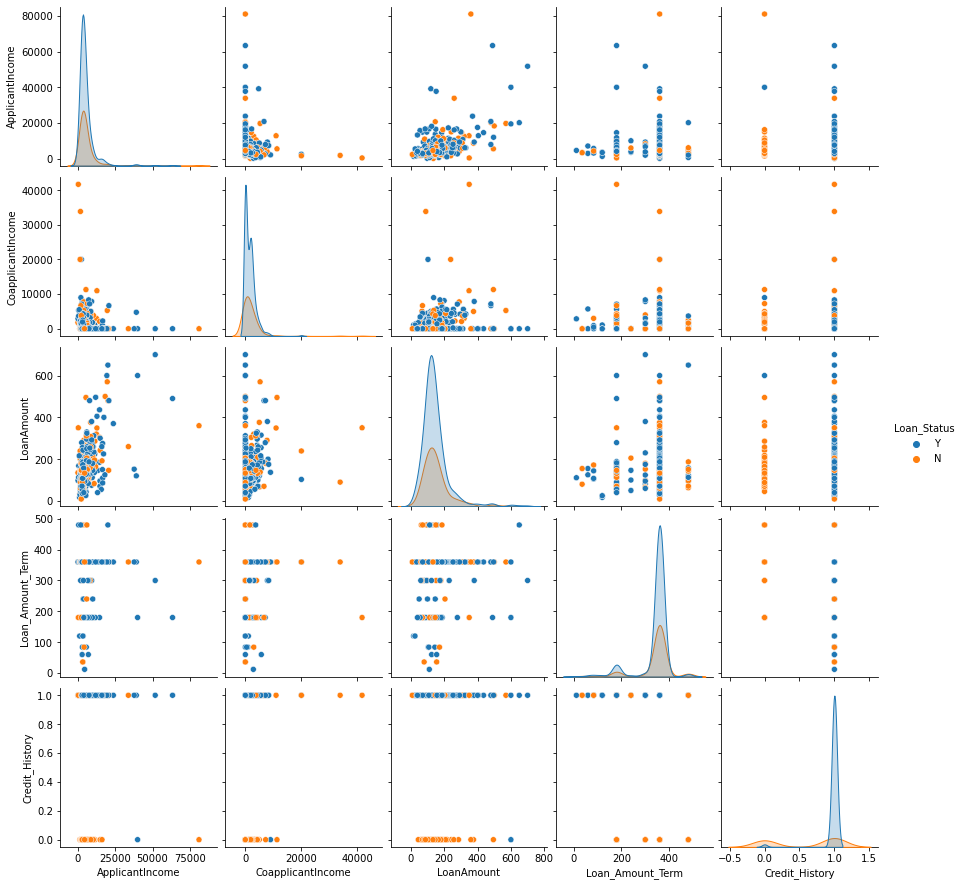

In [107]:
sns.pairplot(df,hue="Loan_Status")

We can observe the linear relationship between ApplicatIncome and LoanAmount, CoapplicantIncome and LoanAmount, ApplicantIncome and TotalIncome. We can also observe the correlation in some columns also there are outliers present in some of the columns.

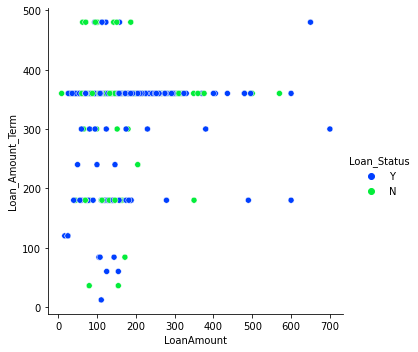

In [108]:
plt.style.use('seaborn-bright')
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status')

if the loan applicant's Loan amount range and loan amount term range is between 200 and 300n,300 and 400 respectively then chance of geting loan is very high.

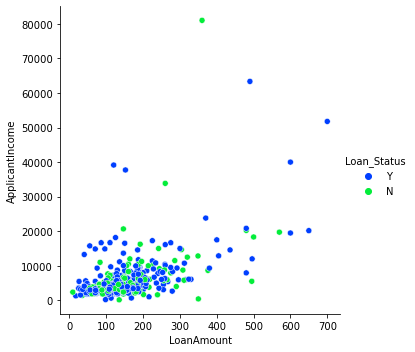

In [112]:
sns.relplot(data=df,x='LoanAmount',y='ApplicantIncome',hue='Loan_Status')

From the above plot we are not geting any clue of chance of geting loan is high.

In [113]:
#checking skewness
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [114]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000


<AxesSubplot:>

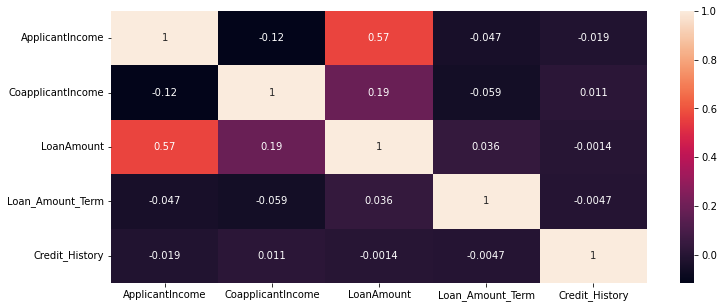

In [115]:
#checking corrleation using heatmap
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

we see that The other columns do not have a good correlation with the target column

# checking VIF

In [117]:
numerical_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [118]:
p=df[['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']]

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#define a function to calculate VIF score
def vif_clac():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(p.values,i) for i in range(p.shape[1])]
    vif["features"]=p.columns
    print(vif)

In [120]:
#checking VIF score
vif_clac()

   VIF Factor           features
0    2.847862    ApplicantIncome
1    1.460972  CoapplicantIncome
2    6.530335         LoanAmount
3    7.765666   Loan_Amount_Term
4    5.813353     Credit_History


we see that VIF score of "Loan_Amount_Term" column is maximum.so,we drop this column from the DataFrame.

In [121]:
#droping "Loan_Amount_Term"
df=df.drop("Loan_Amount_Term",axis=1)

In [122]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,1.0,Urban,Y


# LabelEncoding

In [125]:
df.nunique().to_frame('unique values')

,unique values
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Credit_History,2
Property_Area,3


In [126]:
list=["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area","Loan_Status"]

In [128]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in list:
    df[i]=le.fit_transform(df[i]).astype(float)

In [129]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,1.0,2.0,1.0


# checking outliers

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    float64
 10  Loan_Status        614 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 52.9 KB


<AxesSubplot:xlabel='ApplicantIncome'>

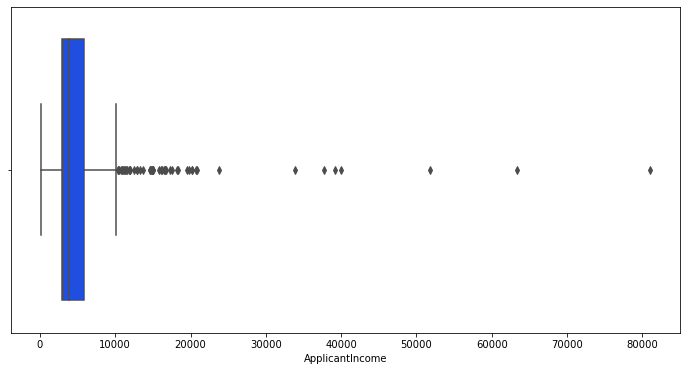

In [131]:
plt.figure(figsize=(12,6))
sns.boxplot(df['ApplicantIncome'])

we see that there are many outliers exist in "ApplicantIncome" column

<AxesSubplot:xlabel='CoapplicantIncome'>

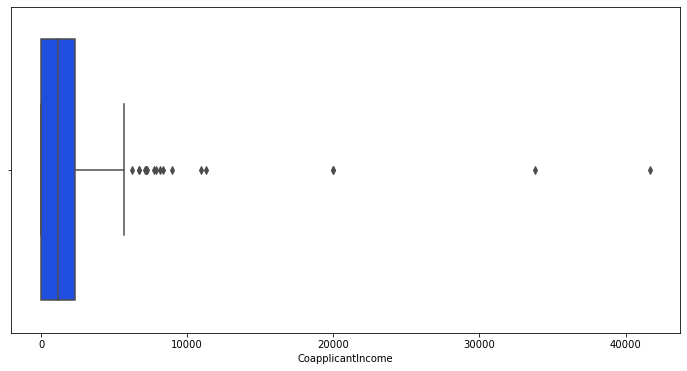

In [132]:
plt.figure(figsize=(12,6))
sns.boxplot(df['CoapplicantIncome'])

we see that there are many outliers exist in "CoapplicantIncome" column

<AxesSubplot:xlabel='LoanAmount'>

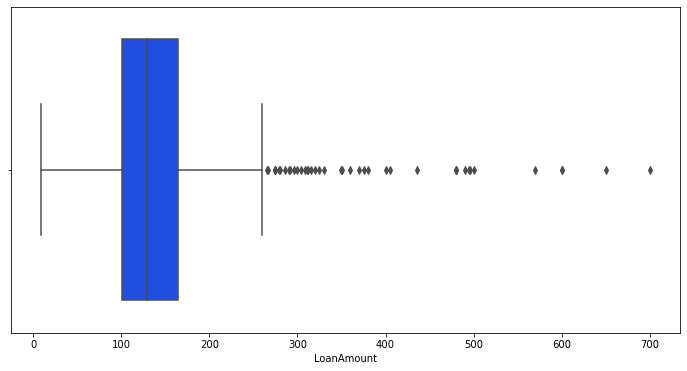

In [133]:
plt.figure(figsize=(12,6))
sns.boxplot(df['LoanAmount'])

<AxesSubplot:>

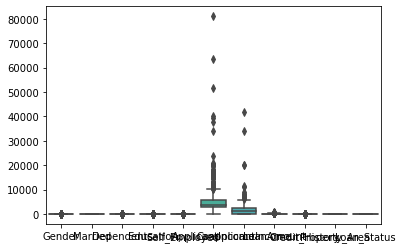

In [134]:
sns.boxplot(data=df)

Remove The Outliers From The DataFrame By Zscore

In [135]:
from scipy.stats import zscore


In [136]:
z=np.abs(zscore(df))
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.000000,0.411733,1.223298,0.674519
1,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.219273,0.411733,1.318513,1.482537
2,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.957641,0.411733,1.223298,0.674519
3,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.314547,0.411733,1.223298,0.674519
4,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.064454,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.898095,0.411733,1.318513,0.674519
610,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.267279,0.411733,1.318513,0.674519
611,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.269371,0.411733,1.223298,0.674519
612,0.472343,0.728816,1.244745,0.528362,0.392601,0.357064,0.554487,0.483367,0.411733,1.223298,0.674519


In [138]:
threshold=3
print(np.where(z>3))

(array([  9, 126, 130, 155, 155, 171, 171, 177, 177, 183, 185, 278, 308,
       333, 333, 369, 402, 409, 417, 432, 443, 487, 506, 523, 525, 561,
       581, 600, 604], dtype=int64), array([6, 5, 7, 5, 7, 5, 7, 6, 7, 5, 5, 7, 7, 5, 7, 7, 6, 5, 6, 7, 5, 7,
       7, 7, 7, 7, 6, 6, 7], dtype=int64))


In [141]:
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,1.0,2.0,1.0


In [142]:
print(df.shape)
print(df_new.shape)

(614, 11)
(589, 11)


Checking percentage of dataloss

In [143]:
percentage_of_dataloss=((614-589)/614)*100
print("percentage of dataloss =",percentage_of_dataloss)

percentage of dataloss = 4.071661237785016


# Dividing data in features and label

In [144]:
x=df_new.iloc[:,0:10] #Independent variable
y=df_new.iloc[:,-1] #Dependent variable

In [145]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,1.0,0.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,1.0,0.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,1.0,2.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,1.0,2.0


In [146]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 589, dtype: float64

# Oversampling

In [147]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [148]:
x,y=smt.fit_resample(x,y)

In [149]:
x.value_counts()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Credit_History  Property_Area
0.0     0.0      0.0         0.0        0.0            645              3683.0             113.000000  1.0             0.0              1
1.0     1.0      0.0         1.0        0.0            3572             4114.0             152.000000  0.0             0.0              1
                                                       2894             2792.0             155.000000  1.0             0.0              1
                                                       2917             536.0              66.000000   1.0             0.0              1
                                                       3000             1666.0             100.000000  0.0             2.0              1
                                                                                                                                       ..
        0.0      0.0         1.0       

In [151]:
y.value_counts()

1.0    407
0.0    407
Name: Loan_Status, dtype: int64

we see that class of target column has been balanced.

Transforming data to remove skewness

In [152]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')
x

array([[ 0.51220473, -1.33008274, -0.88468691, ...,  0.32880533,
         0.63123597,  1.22197511],
       [ 0.51220473,  0.81313239,  0.83037739, ..., -0.01127154,
         0.63123597, -1.37329596],
       [ 0.51220473,  0.81313239, -0.88468691, ..., -1.46228285,
         0.63123597,  1.22197511],
       ...,
       [ 0.51220473,  0.81313239,  1.22620908, ..., -0.11425076,
         0.63123597, -1.1553493 ],
       [ 0.51220473, -1.33008274,  0.84567881, ..., -0.8792069 ,
        -1.28901051, -0.03000717],
       [ 0.51220473,  0.81313239,  1.23447282, ..., -0.59521389,
        -0.69944657, -1.37329596]])

In [154]:
df_new1=pd.DataFrame(x)
df_new1.skew()

0   -1.486427
1   -0.491721
2    0.368980
3    0.961275
4    1.914413
5    0.006979
6   -0.120270
7    0.051954
8   -1.033205
9   -0.163032
dtype: float64

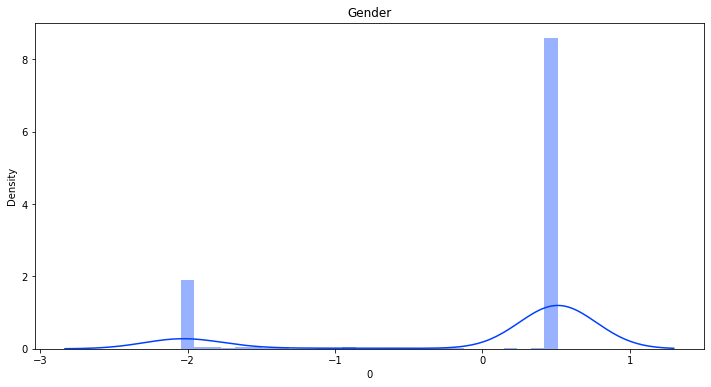

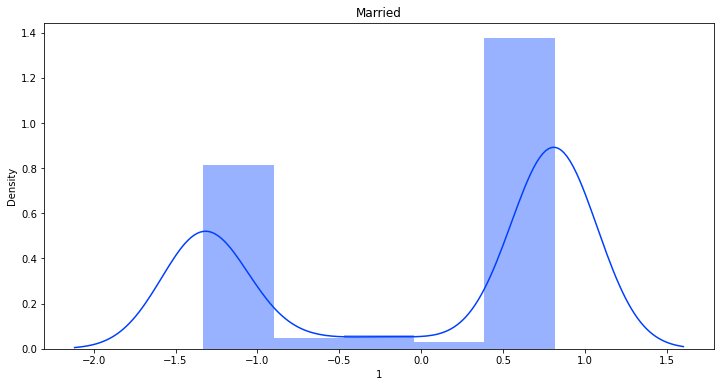

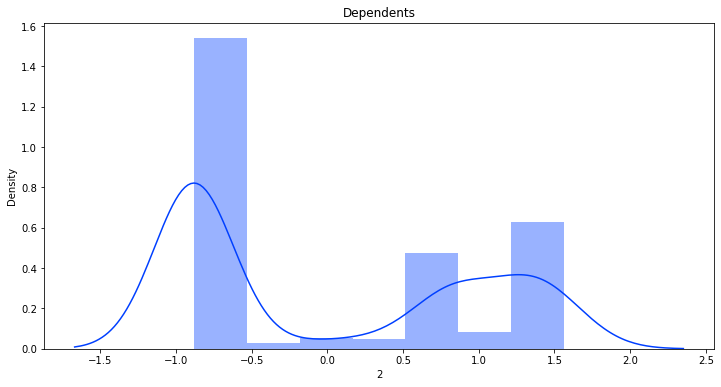

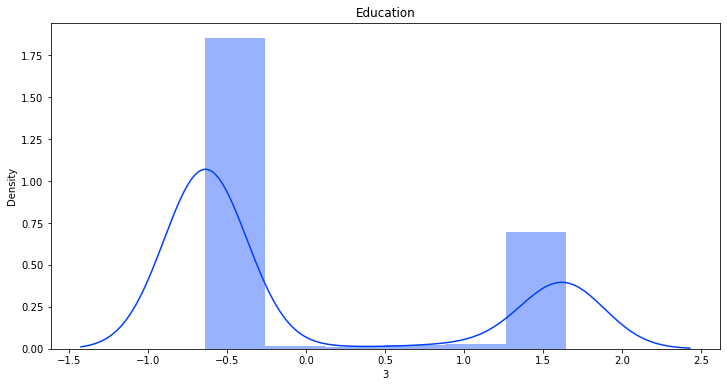

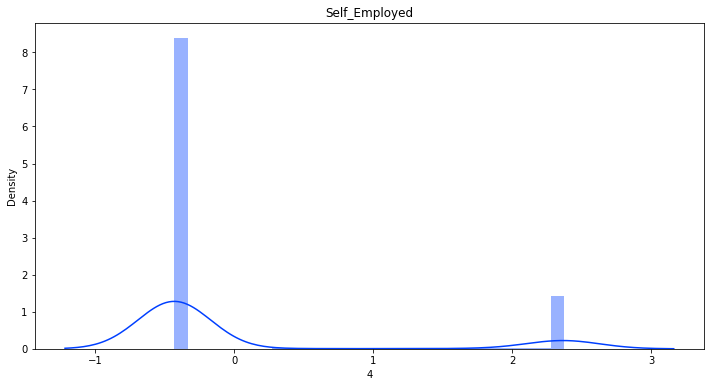

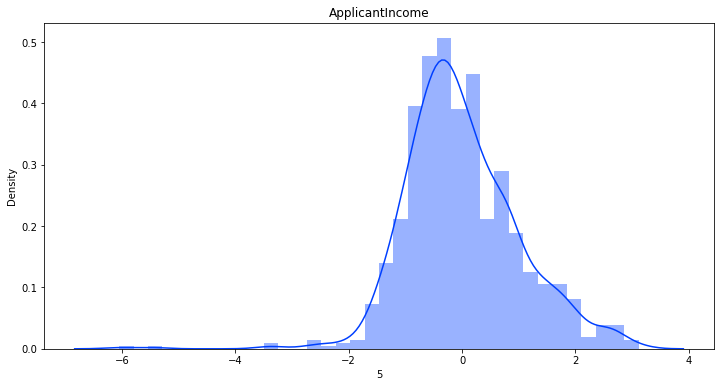

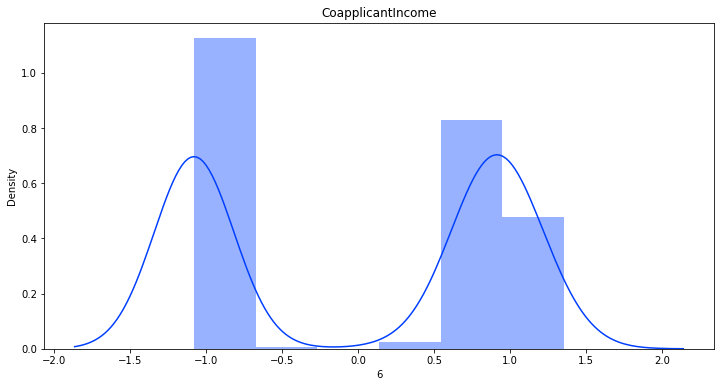

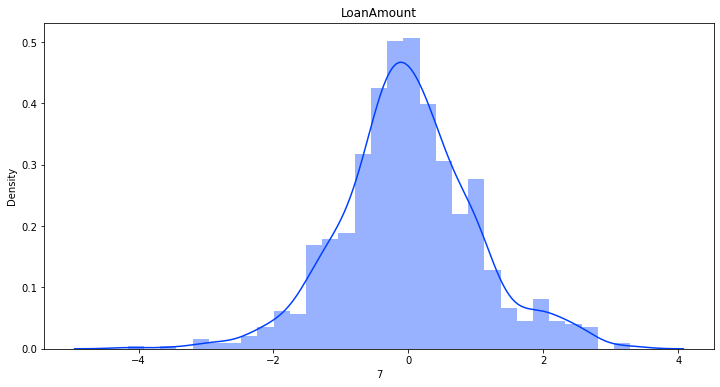

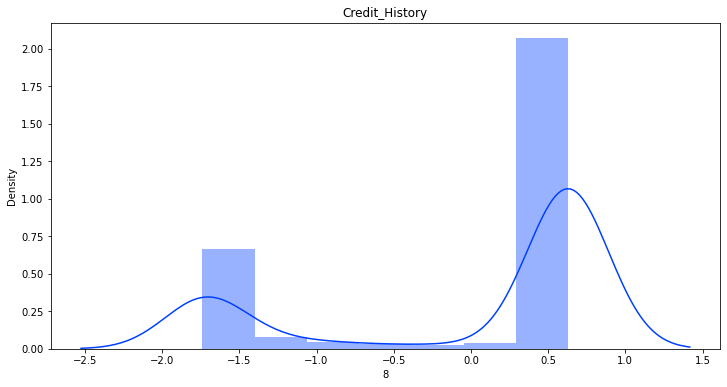

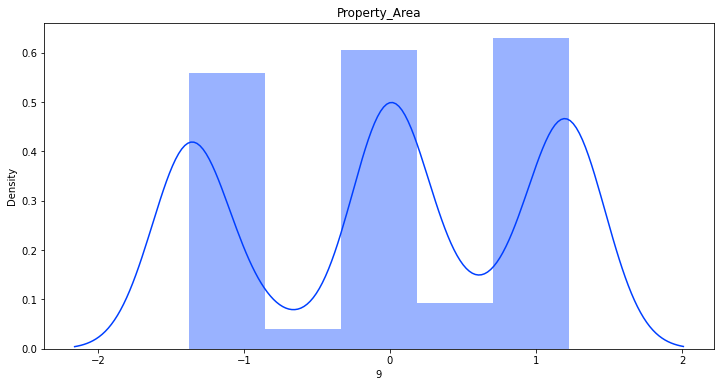

In [155]:
for i in range(10):
    plt.figure(figsize=(12,6))
    sns.distplot(df_new1[df_new1.columns[i]])
    plt.title(df.columns[i])
    plt.show()

skewness removed from the each column

In [156]:
print(df_new.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')


# Model Building

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV


In [159]:
# finding random_state
maxAcc=0
maxRS=0
for i in range(0,600):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAcc:
        macAcc=acc
        maxRS=i
print("Best Accuracy is :",maxAcc,"on random_state:",maxRS)        
        

Best Accuracy is : 0 on random_state: 599


In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=599)

In [161]:
x_train

array([[ 0.51220473,  0.81313239,  1.33342061, ...,  0.02711081,
         0.63123597,  1.22197511],
       [ 0.51220473, -1.33008274,  0.74266322, ..., -0.32089817,
        -1.73928793,  1.22197511],
       [ 0.51220473,  0.81313239, -0.88468691, ..., -0.24994033,
        -1.73928793, -0.00475223],
       ...,
       [ 0.51220473, -1.33008274, -0.88468691, ..., -0.43280779,
        -1.7186917 , -1.21013106],
       [ 0.51220473, -1.33008274, -0.88468691, ..., -3.03525936,
         0.63123597, -0.00475223],
       [ 0.51220473,  0.81313239, -0.88468691, ..., -0.82682746,
         0.63123597,  1.22197511]])

In [162]:
x_test

array([[ 0.51220473,  0.81313239,  1.56598987, ..., -0.73176708,
         0.63123597, -0.00475223],
       [ 0.51220473,  0.81313239,  1.33342061, ...,  0.08398957,
         0.63123597, -0.00475223],
       [ 0.51220473,  0.81313239,  1.56598987, ...,  2.34215931,
         0.63123597, -0.00475223],
       ...,
       [ 0.51220473,  0.81313239, -0.88468691, ..., -0.37516584,
         0.63123597, -1.37329596],
       [ 0.51220473,  0.81313239, -0.88468691, ..., -0.33295446,
         0.63123597, -1.37329596],
       [ 0.51220473,  0.81313239, -0.88468691, ...,  0.72695353,
         0.63123597, -1.37329596]])

In [163]:
y_train

367    1.0
681    0.0
21     0.0
729    0.0
699    0.0
      ... 
765    0.0
314    1.0
682    0.0
93     1.0
241    1.0
Name: Loan_Status, Length: 569, dtype: float64

In [164]:
y_test

108    1.0
412    1.0
132    0.0
329    0.0
683    0.0
      ... 
769    0.0
85     1.0
528    1.0
403    1.0
217    0.0
Name: Loan_Status, Length: 245, dtype: float64

In [165]:
print("x_train shape =",x_train.shape)
print("x_test shape =",x_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape =",y_test.shape)

x_train shape = (569, 10)
x_test shape = (245, 10)
y_train shape = (569,)
y_test shape = (245,)


In [166]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
grb=GradientBoostingClassifier()
adb=AdaBoostClassifier()

In [167]:
model=[lg,gnb,svc,dtc,knn,rfc,grb,adb]

In [168]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('#'*100)

Accuracy score of  LogisticRegression() is
0.7591836734693878
[[ 65  51]
 [  8 121]]
              precision    recall  f1-score   support

         0.0       0.89      0.56      0.69       116
         1.0       0.70      0.94      0.80       129

    accuracy                           0.76       245
   macro avg       0.80      0.75      0.75       245
weighted avg       0.79      0.76      0.75       245

####################################################################################################
Accuracy score of  GaussianNB() is
0.7591836734693878
[[ 60  56]
 [  3 126]]
              precision    recall  f1-score   support

         0.0       0.95      0.52      0.67       116
         1.0       0.69      0.98      0.81       129

    accuracy                           0.76       245
   macro avg       0.82      0.75      0.74       245
weighted avg       0.82      0.76      0.74       245

###################################################################################

# Checking Cross Val Score

In [169]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print('*'*100)

For CV = 2
cross validation score of LogisticRegression() is = 0.7678132678132679
cross validation score of GaussianNB() is = 0.7751842751842752
cross validation score of SVC() is = 0.757985257985258
cross validation score of DecisionTreeClassifier() is = 0.7628992628992629
cross validation score of KNeighborsClassifier() is = 0.7530712530712531
cross validation score of RandomForestClassifier() is = 0.7972972972972974
cross validation score of GradientBoostingClassifier() is = 0.7776412776412777
cross validation score of AdaBoostClassifier() is = 0.7248157248157248
****************************************************************************************************
For CV = 3
cross validation score of LogisticRegression() is = 0.7678803993922293
cross validation score of GaussianNB() is = 0.7801850444975038
cross validation score of SVC() is = 0.7617484263077925
cross validation score of DecisionTreeClassifier() is = 0.7617936473482382
cross validation score of KNeighborsClassifier() i

we get best best cross vall score from RandomForestClassifier for CV=8

# Parameter Tuning for RandomForestClassifier

In [170]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
gcv1=GridSearchCV(RandomForestClassifier(),parameters,cv=9,scoring='accuracy')
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [171]:
gcv1.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto')

In [173]:
final_model=RandomForestClassifier(max_depth=8, max_features='auto')

In [174]:
final_model.fit(x_train,y_train)
predm1=final_model.predict(x_test)
predm2=final_model.predict(x_train)
print('Test Accuracy score of final model =',accuracy_score(y_test,predm1))
print('Train Accuracy score of final model =',accuracy_score(y_train,predm2))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))

Test Accuracy score of final model = 0.8326530612244898
Train Accuracy score of final model = 0.929701230228471
[[ 84  32]
 [ 10 119]]
              precision    recall  f1-score   support

         0.0       0.89      0.72      0.80       116
         1.0       0.79      0.92      0.85       129

    accuracy                           0.83       245
   macro avg       0.84      0.82      0.82       245
weighted avg       0.84      0.83      0.83       245



# ROCAUC curve

In [177]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.6116536 , 0.70348162, 0.7380565 , 0.56538457, 0.55671086,
       0.01012605, 0.69270608, 0.17779141, 0.78023654, 0.44981718,
       0.05455204, 0.017888  , 0.00480782, 0.66052419, 0.61833641,
       0.70507506, 0.66859376, 0.5974114 , 0.71555203, 0.48122985,
       0.04373332, 0.78756153, 0.00587376, 0.83088612, 0.8025331 ,
       0.81991763, 0.7503946 , 0.83365212, 0.00729893, 0.76946574,
       0.71043954, 0.56834211, 0.79674918, 0.02069094, 0.81047619,
       0.65756661, 0.69289579, 0.5723949 , 0.8255215 , 0.85299287,
       0.82571965, 0.78837167, 0.7815225 , 0.78567682, 0.58384705,
       0.00938676, 0.01196497, 0.79792561, 0.00847878, 0.74424121,
       0.84229859, 0.78816613, 0.00895016, 0.00612688, 0.68816687,
       0.60232557, 0.65119161, 0.61374588, 0.70542879, 0.00988425,
       0.72461655, 0.74637877, 0.44404884, 0.02037508, 0.81802057,
       0.0076508 , 0.08448038, 0.57859973, 0.62418919, 0.70682945,
       0.77476769, 0.68180437, 0.00956961, 0.89108379, 0.65962

In [178]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [179]:
fpr

array([0.        , 0.        , 0.        , 0.00862069, 0.00862069,
       0.01724138, 0.01724138, 0.02586207, 0.02586207, 0.03448276,
       0.03448276, 0.04310345, 0.04310345, 0.06034483, 0.06034483,
       0.06896552, 0.06896552, 0.07758621, 0.07758621, 0.09482759,
       0.09482759, 0.15517241, 0.15517241, 0.17241379, 0.17241379,
       0.20689655, 0.20689655, 0.21551724, 0.21551724, 0.23275862,
       0.23275862, 0.25      , 0.25      , 0.25862069, 0.25862069,
       0.26724138, 0.26724138, 0.27586207, 0.27586207, 0.29310345,
       0.29310345, 0.30172414, 0.30172414, 0.31034483, 0.31034483,
       0.32758621, 0.32758621, 0.3362069 , 0.3362069 , 0.34482759,
       0.34482759, 0.35344828, 0.35344828, 0.36206897, 0.36206897,
       0.37068966, 0.37068966, 0.38793103, 0.38793103, 0.40517241,
       0.40517241, 0.43103448, 0.43103448, 0.43965517, 0.43965517,
       0.45689655, 0.45689655, 0.47413793, 0.47413793, 0.63793103,
       0.63793103, 0.93965517, 0.93965517, 0.98275862, 0.98275

In [180]:
tpr

array([0.        , 0.00775194, 0.01550388, 0.01550388, 0.07751938,
       0.07751938, 0.17829457, 0.17829457, 0.2248062 , 0.2248062 ,
       0.24031008, 0.24031008, 0.26356589, 0.26356589, 0.41860465,
       0.41860465, 0.45736434, 0.45736434, 0.46511628, 0.46511628,
       0.47286822, 0.47286822, 0.48837209, 0.48837209, 0.49612403,
       0.49612403, 0.51162791, 0.51162791, 0.51937984, 0.51937984,
       0.57364341, 0.57364341, 0.58914729, 0.58914729, 0.6124031 ,
       0.6124031 , 0.62015504, 0.62015504, 0.62790698, 0.62790698,
       0.70542636, 0.70542636, 0.71317829, 0.71317829, 0.73643411,
       0.73643411, 0.7751938 , 0.7751938 , 0.79069767, 0.79069767,
       0.79844961, 0.79844961, 0.80620155, 0.80620155, 0.84496124,
       0.84496124, 0.85271318, 0.85271318, 0.87596899, 0.87596899,
       0.90697674, 0.90697674, 0.92248062, 0.92248062, 0.9379845 ,
       0.9379845 , 0.94573643, 0.94573643, 0.97674419, 0.97674419,
       0.98449612, 0.98449612, 0.99224806, 0.99224806, 1.     

In [181]:
auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print("roc_auc_score=",auc_score)

roc_auc_score= 0.8258821170809943


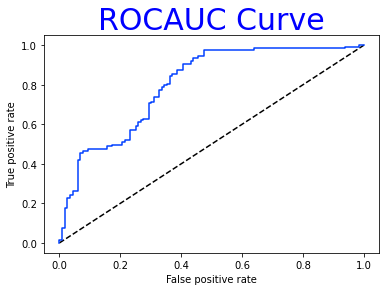

In [182]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROCAUC Curve',color='Blue',size=30)
plt.show()

# saving model

In [183]:
import joblib                                                                                                     
joblib.dump(final_model,'Loan Application Status Prediction Project Model.pkl')

['Loan Application Status Prediction Project Model.pkl']